# Truncated SVD

To understand Truncated SVD. We need to understand the EVD and SVD. 

## Eigenvalue decomposition

Eigenvalue decomposition or EVD is a technique by which we break matrix into its eigenvalues and eigenvectors. So by defination if we take a square matrix A. We can write, 
$$
    Au = \lambda u,  u\neq0 .
$$
If we write the above equation in matrix format for eigenvalues and eigenvectors the equation becomes
$$
    AU = U\Lambda
$$
Here,
$$
U = 
\begin{pmatrix}
\vdots & \vdots & \cdots & \vdots\\
u_{1} & u_{1} & \cdots & u_{n}\\
\vdots & \vdots & \cdots & \vdots\\
\end{pmatrix}
,
\Lambda = 
diag\begin{pmatrix}
u_{1} & u_{1} & \cdots & u_{n}\\
\end{pmatrix}
$$
### Assumption 1
If we assume that A is a linearly independent matrix the we can inverse U from the main equation and the value becomes (diagonalization)
$$
    A = U\Lambda U^{-1}
$$
### Assumption 2
If A is real and symmetric then all the eigenvalues are real and eigenvectors are orthonormal. So Now the equation becomes
$$
    A = U\Lambda U^{T} = 
\begin{pmatrix}
\vdots & \vdots & \cdots & \vdots\\
u_{1} & u_{1} & \cdots & u_{n}\\
\vdots & \vdots & \cdots & \vdots\\
\end{pmatrix}
\begin{pmatrix}
\lambda _{1} \\
\quad & \lambda _{2} \\
\quad & \quad & \ddots \\
\quad & \quad & \quad & \lambda _{3} \\
\end{pmatrix}
\begin{pmatrix}
\cdots & u_{1}^T & \cdots\\
\cdots & u_{1}^T & \cdots\\
\quad & \vdots & \quad \\
\cdots & u_{n}^T & \cdots\\
\end{pmatrix}
$$

## Singular value decomposition (SVD)
In EVD we assumed that the matrix is symmetric. What if it is unsymmetric or has MxN dimensions. In that case we talk about SVD. 

So the same equation becomes this if we consider M dimension in U and N dimensions in V.

$$
    A = US V^{T} = 
\begin{pmatrix}
\vdots & \vdots & \cdots & \vdots\\
u_{1} & u_{1} & \cdots & u_{m}\\
\vdots & \vdots & \cdots & \vdots\\
\end{pmatrix}
\begin{pmatrix}
\lambda _{1} \\
\quad & \lambda _{2} \\
\quad & \quad & \ddots \\
\quad & \quad & \quad & \lambda _{3} \\
\end{pmatrix}
\begin{pmatrix}
\cdots & v_{1}^T & \cdots\\
\cdots & v_{1}^T & \cdots\\
\quad & \vdots & \quad \\
\cdots & v_{n}^T & \cdots\\
\end{pmatrix}
$$

and vice-versa. So here 2 types of matrices can be formed with A.

For more information please go through linear algebra books

## Truncated SVD

As we know 
$$
A=USV^T 
$$
For truncated version we consider only suppose K columns then the equation becomes,
$$
\hat A_{K} = U_{K} S_{K} V_{K}^{T}
$$
So intially if K = R = Rank(A) there is no error, as it is SVD. But when we make K < R, we introduce errors in A which is called a truncated form of SVD called Truncated SVD

## How it is useful

If data is present in matrix format then we can store it with less no. of values retaining the information. This is one of the basic concepts used AI Modelling. Here is some code showing it.

Image Shape : (900, 600)
Image Intital Decomposition Information
U : (900, 900)
S : (600,)
V : (600, 600)


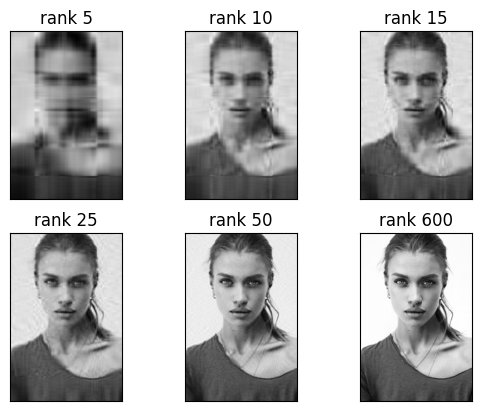

In [30]:

import numpy as np
import matplotlib.pyplot as plt 
import cv2

img = cv2.cvtColor(cv2.imread('sample.jpg'),cv2.COLOR_RGB2GRAY)
X = np.array(img)
r = np.linalg.matrix_rank(img)
U, sigma, V = np.linalg.svd(X, full_matrices=True)
print(f'Image Shape : {X.shape}')
print('Image Intital Decomposition Information')
print(f'U : {U.shape}')
print(f'S : {sigma.shape}')
print(f'V : {V.shape}')
ranks = [5, 10, 15, 25, 50, r]
R = len(ranks)

for i in range(R):
    k = ranks[i] 
    x_hat = np.dot(np.dot(U[:, :k], np.diag(sigma[:k])), V[:k, :])   
    plt.subplot(2, 3, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_hat, cmap='gray')
    plt.title("rank {}".format(k))
plt.show()

## Analysis

Here you can see that as we decrease the no. of pixels from rank 600(Original rank of image) to rank 5. The amount of blur/error increases as we represent the same information using less no. of pixels for lower ranks.

## References

Here the code used is modified from 


https://github.com/probml/pyprobml



I have studied Probablistic Machine Learning By Kevin P. Murphy and written everything as per my understanding.